In [1]:
import pandas as pd
from functools import reduce

In [2]:
users = pd.read_csv('Урок_2_Материалы/users.csv')
subscribers = pd.read_csv('Урок_2_Материалы/subscribers.csv')
m_camp = pd.read_csv('Урок_2_Материалы/marketing_campaign.csv')
datasets = [m_camp, users, subscribers]
df = reduce(lambda left,right: pd.merge(left, right, on = 'user_id', how = 'left'), datasets)

In [3]:
df['converted'] = df['converted'].apply(lambda x: 1 if x == True else 0)

In [4]:
df.head()

,user_id,date_served,marketing_channel,variant,language_displayed,converted,age_group,language_preferred,subscribing_channel,date_subscribed,date_canceled,is_retained
0,a1000,1/1/18,House Ads,personalization,English,1,0-18 years,English,House Ads,1/1/18,NaN,True
1,a1001,1/1/18,House Ads,personalization,English,1,19-24 years,English,House Ads,1/1/18,NaN,True
2,a1002,1/1/18,House Ads,personalization,English,1,24-30 years,English,House Ads,1/1/18,NaN,True
3,a1003,1/1/18,House Ads,personalization,English,1,30-36 years,English,House Ads,1/1/18,NaN,True
4,a1004,1/1/18,House Ads,personalization,English,1,36-45 years,English,House Ads,1/1/18,NaN,True


In [6]:
df['variant'].value_counts()

control            5091
personalization    4946
Name: variant, dtype: int64

Так как количество элеметов разных типов не совпадает, то надо уровнять выборки<br>
Для этого создаем пустой датасет. В него копируем все значения меньшей выборки и <br>
случайную подвыборку элементов из второй выборки по количеству элементов первой выборки<br>
На этих данных проводим расчет 

In [31]:
data = pd.DataFrame()

In [39]:
data['personalization'] = df['converted'].loc[df['variant']=='personalization']
data['control'] = df['converted'].loc[df['variant']=='control'].sample(4946).to_list()

array([[<AxesSubplot:title={'center':'personalization'}>,
        <AxesSubplot:title={'center':'control'}>]], dtype=object)

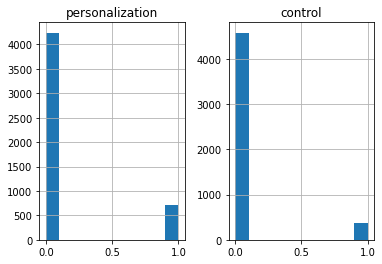

In [66]:
data.hist()

In [48]:
person = data['personalization'].value_counts().to_list()
control = data['control'].value_counts().to_list()

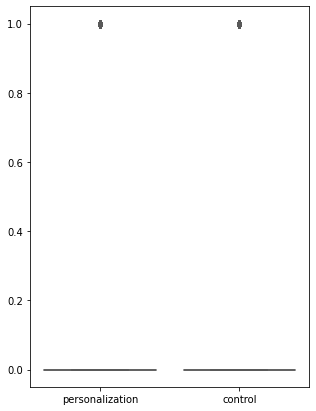

In [51]:
print(control)
print(control[0]+control[1])

[4584, 362]
4946


In [52]:
print(person)
print(person[0]+person[1])

[4241, 705]
4946


In [53]:
import scipy.stats as stats
result = stats.chi2_contingency([control,person], correction = False)
chisq, pvalue = result[:2]
print('chisq = {}, pvalue = {}'.format(chisq, pvalue))

chisq = 123.59281223201319, pvalue = 1.034331514586603e-28


Уровень значимости p-value оказывается очень мал<br>
Уровень доверия позволяет сделать вывод о том, что в вариант 'control' лучше конвертирует 